<a href="https://colab.research.google.com/github/widawaryani/AI_Clustering/blob/main/Agglomerative_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


Jumlah baris dan kolom: (200, 5)

Tipe data tiap kolom:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

5 baris pertama:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Statistik deskriptif:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
mi

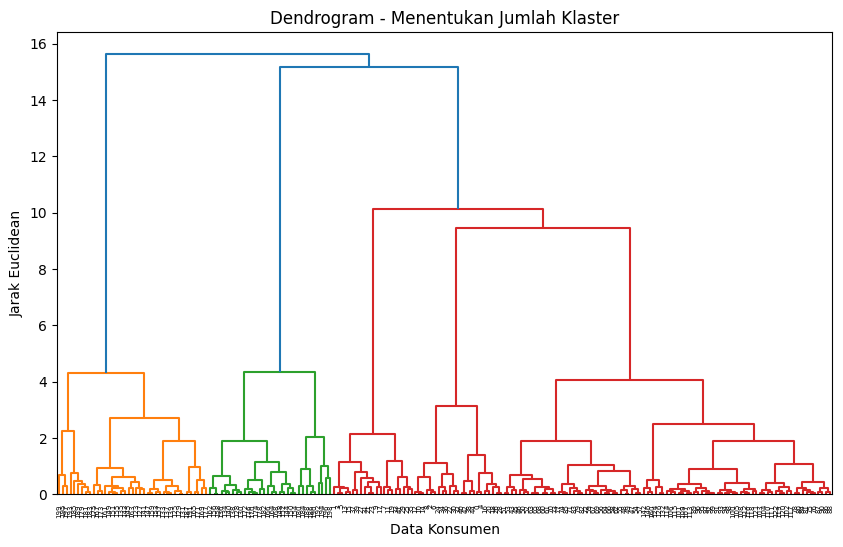

Silhouette Score: 0.554


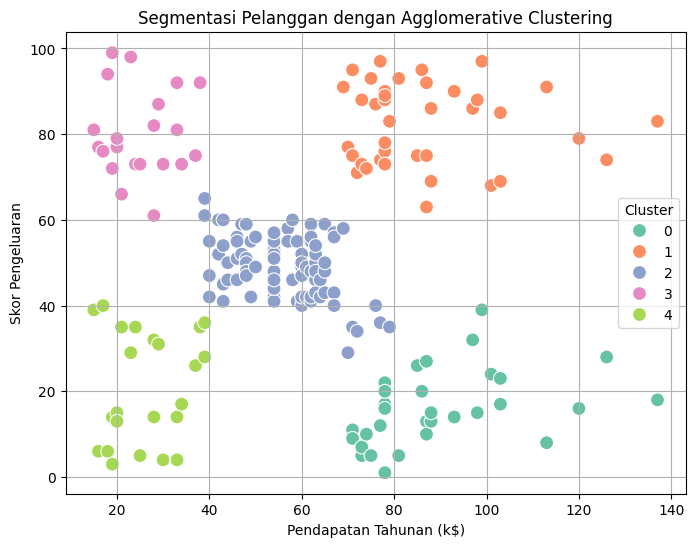

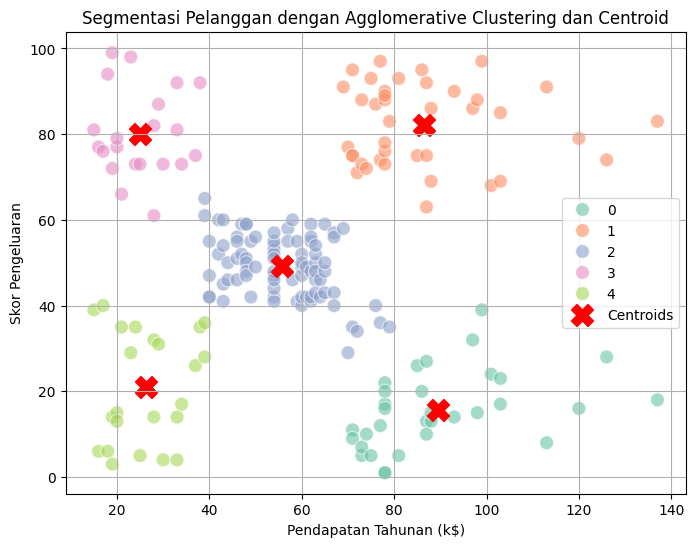

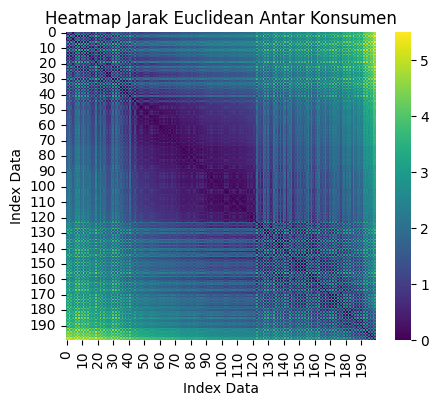

In [ ]:
# 1. Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform

# 2. Load dataset
df = pd.read_csv('Mall_Customers.csv')
# 3. Informasi Awal Data
print("Jumlah baris dan kolom:", df.shape)
print("\nTipe data tiap kolom:")
print(df.dtypes)
print("\n5 baris pertama:")
print(df.head())
print("\nStatistik deskriptif:")
print(df.describe())

# 4. Pilih fitur yang relevan untuk clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 5. Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 6. Dendrogram untuk tentukan jumlah klaster
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Dendrogram - Menentukan Jumlah Klaster')
plt.xlabel('Data Konsumen')
plt.ylabel('Jarak Euclidean')
plt.show()

# 7. Agglomerative Clustering dengan 5 klaster
model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
df['Cluster'] = model.fit_predict(X_scaled)

# Evaluasi dengan Silhouette Score
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {score:.3f}")


# 8. Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='Set2', data=df, s=100)
plt.title('Segmentasi Pelanggan dengan Agglomerative Clustering')
plt.xlabel('Pendapatan Tahunan (k$)')
plt.ylabel('Skor Pengeluaran')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# 9. Visualisasi centroid (rata-rata) tiap cluster
centroids = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='Set2', data=df, s=100, alpha=0.6)

# Tambahkan titik centroid
plt.scatter(centroids['Annual Income (k$)'], centroids['Spending Score (1-100)'],
            s=250, c='red', marker='X', label='Centroids')

plt.title('Segmentasi Pelanggan dengan Agglomerative Clustering dan Centroid')
plt.xlabel('Pendapatan Tahunan (k$)')
plt.ylabel('Skor Pengeluaran')
plt.legend()
plt.grid(True)
plt.show()

# 10. Heatmap jarak antar data (dari matriks linkage)
dist_matrix = squareform(pdist(X_scaled, metric='euclidean'))

plt.figure(figsize=(5, 4))
sns.heatmap(dist_matrix, cmap='viridis')
plt.title('Heatmap Jarak Euclidean Antar Konsumen')
plt.xlabel('Index Data')
plt.ylabel('Index Data')
plt.show()



